In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [38]:
df=pd.read_csv('/content/covid_19_data.csv')

In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [39]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)

In [5]:
df.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [40]:
df.rename(columns={'ObservationDate':'Date','Province/State':'Province','Country/Region':'Country'},inplace=True)

In [8]:
df.head()

,Date,Province,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [41]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df.head()

,Date,Province,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [11]:
df.describe()

,Confirmed,Deaths,Recovered
count,68558.000000,68558.000000,6.855800e+04
mean,10472.017883,564.674874,4.830826e+03
std,32092.929744,2516.087659,2.712376e+04
min,0.000000,0.000000,0.000000e+00
25%,107.000000,1.000000,0.000000e+00
50%,998.000000,17.000000,1.370000e+02
75%,5361.000000,168.000000,1.488000e+03
max,416434.000000,41128.000000,1.160087e+06


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68558 entries, 0 to 68557
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       68558 non-null  datetime64[ns]
 1   Province   44125 non-null  object        
 2   Country    68558 non-null  object        
 3   Confirmed  68558 non-null  float64       
 4   Deaths     68558 non-null  float64       
 5   Recovered  68558 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 3.1+ MB


In [13]:
df.fillna('NA',inplace=True)

In [43]:
imputer=SimpleImputer(strategy='constant')
df2=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68558 entries, 0 to 68557
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       68558 non-null  datetime64[ns]
 1   Province   68558 non-null  object        
 2   Country    68558 non-null  object        
 3   Confirmed  68558 non-null  float64       
 4   Deaths     68558 non-null  float64       
 5   Recovered  68558 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 3.1+ MB


In [15]:
df.head(10)

,Date,Province,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
5,2020-01-22,Guangdong,Mainland China,26.0,0.0,0.0
6,2020-01-22,Guangxi,Mainland China,2.0,0.0,0.0
7,2020-01-22,Guizhou,Mainland China,1.0,0.0,0.0
8,2020-01-22,Hainan,Mainland China,4.0,0.0,0.0
9,2020-01-22,Hebei,Mainland China,1.0,0.0,0.0


In [ ]:
df3=df2.groupby('Country')[['Country','Confirmed','Deaths','Recovered']].sum().reset_index()

In [19]:
df2.head(15)

,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,1684683.0,40510.0,626252.0
3,Albania,164738.0,4804.0,100822.0
4,Algeria,996868.0,70037.0,632529.0
5,Andorra,88144.0,5059.0,63453.0
6,Angola,16542.0,827.0,4928.0
7,Antigua and Barbuda,3927.0,305.0,2182.0
8,Argentina,3382782.0,78271.0,1221566.0
9,Armenia,1331748.0,22253.0,678146.0


In [46]:
df3=df2.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [29]:
df3=df3[df3['Confirmed']>100]

In [47]:
df3.head()

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,"('St. Martin',)",2020-03-10,2.0,0.0,0.0
2,Afghanistan,2020-02-24,1.0,0.0,0.0
3,Afghanistan,2020-02-25,1.0,0.0,0.0
4,Afghanistan,2020-02-26,1.0,0.0,0.0


#MATPLOTLIB

In [31]:
import matplotlib.pyplot as plt

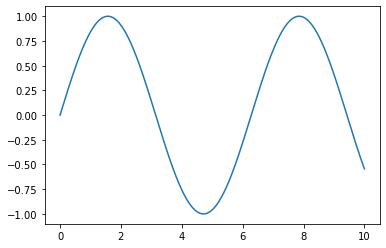

In [32]:
x=np.linspace(0,10,1000)
plt.plot(x,np.sin(x))

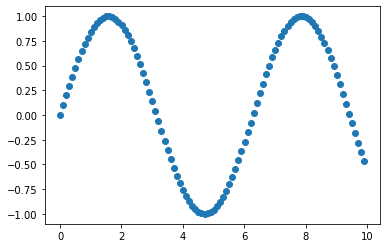

In [34]:
plt.scatter(x[::10],np.sin(x)[::10])

In [36]:
y=np.sin(x)

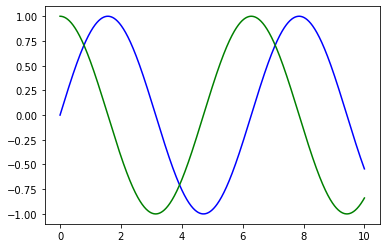

In [37]:
plt.plot(x,y,color='b')
plt.plot(x,np.cos(x),color='g')

#COVID CONTD...

In [49]:
countries=df3['Country'].unique()
len(countries)

223

In [55]:
df3.head(20)

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,"('St. Martin',)",2020-03-10,2.0,0.0,0.0
2,Afghanistan,2020-02-24,1.0,0.0,0.0
3,Afghanistan,2020-02-25,1.0,0.0,0.0
4,Afghanistan,2020-02-26,1.0,0.0,0.0
5,Afghanistan,2020-02-27,1.0,0.0,0.0
6,Afghanistan,2020-02-28,1.0,0.0,0.0
7,Afghanistan,2020-02-29,1.0,0.0,0.0
8,Afghanistan,2020-03-01,1.0,0.0,0.0
9,Afghanistan,2020-03-02,1.0,0.0,0.0


In [50]:
for idx in range(0,len(countries)):
  c=df3[df3['Country']==countries[idx]].reset_index()
  plt.scatter(np.arange(0,len(c)),c['Confirmed'],color='blue',label='Confirmed')
  plt.scatter(np.arange(0,len(c)),c['Recovered'],color='green',label='Recovered')
  plt.scatter(np.arange(0,len(c)),c['Deaths'],color='red',label='Deaths')
  plt.title(countries[idx])
  plt.xlabel('Days since first case')
  plt.ylabel('Number of cases')
  plt.legend()
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [51]:
df4=df3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [54]:
df4

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555.0,17.0,28.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,1438.0,42.0,39.0
4,2020-01-26,2118.0,56.0,52.0
...,...,...,...,...
176,2020-07-16,13805296.0,589911.0,7711525.0
177,2020-07-17,14055299.0,596518.0,7894890.0
178,2020-07-18,14292922.0,602144.0,8045827.0
179,2020-07-19,14507491.0,606173.0,8133663.0


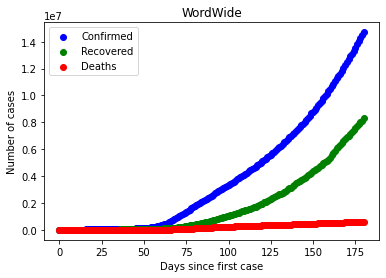

In [52]:
c=df4
plt.scatter(np.arange(0,len(c)),c['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(c)),c['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(c)),c['Deaths'],color='red',label='Deaths')
plt.title('WordWide')
plt.xlabel('Days since first case')
plt.ylabel('Number of cases')
plt.legend()
plt.show()